# 1. Introduction

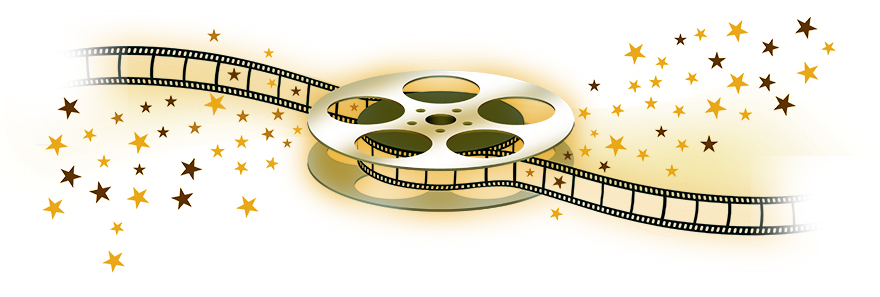

**The project workflow is listed below:**


    The project workflow is listed below:


        1. Introduction
        2. Comet
        3. Install Packages
        4. Importing Dataset
        5. Data Preprocessing and Data Cleaning
        6. Exploratory Data Analysis
        7. Model Selection
        8. Model Evaluation 
        9. Submission
        10. Conclusion

# 2. Installing Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from surprise.model_selection import train_test_split

# 4.Importing dataset

In [5]:
# Load the train and test datasets
df_sample_submission = pd.read_csv('sample_submission.csv')
df_movies = pd.read_csv('movies.csv', index_col='movieId')
df_imdb= pd.read_csv('imdb_data.csv', index_col='movieId')
df_genome_scores = pd.read_csv('genome_scores.csv', index_col='movieId')
df_genome_tags= pd.read_csv('genome_tags.csv',index_col='tagId')
df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv', index_col='movieId')

In [ ]:
df_sample_submission.head()

In [ ]:
df_movies.head()

In [ ]:
df_imdb.head()

In [ ]:
df_genome_scores.head()

In [ ]:
df_genome_tags.head()

In [7]:
df_train.size

40000152

In [8]:
df_test.size

10000038

In [9]:
df_tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [10]:
df_links.head()

imdbId   tmdbId
movieId                 
1        114709    862.0
2        113497   8844.0
3        113228  15602.0
4        114885  31357.0
5        113041  11862.0

# 5. Data Preprocessing and Data Cleaning

In [11]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)
reader, data

(<surprise.reader.Reader at 0x1c08b577700>,
 <surprise.dataset.DatasetAutoFolds at 0x1c08b577160>)

In [12]:
from surprise import SVD
from surprise.model_selection import cross_validate
svd = SVD(verbose=True, n_epochs=10)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8638  0.8649  0.8633  0.8640  0.0007  
MAE (testset)     0.6597  0.6598  0.6588  0.6594  0.0004  
Fit time          182.11  189.97  192.28  188.12  4.35    
Test time         45.68   48.10   39.28   44.35   3.72    


{'test_rmse': array([0.86378615, 0.86494193, 0.8633229 ]),
 'test_mae': array([0.65965724, 0.65978004, 0.65880611]),
 'fit_time': (182.1091754436493, 189.9651792049408, 192.27616548538208),
 'test_time': (45.67899680137634, 48.09800171852112, 39.280378341674805)}

In [13]:
svd.predict(uid=10, iid=100)

Prediction(uid=10, iid=100, r_ui=None, est=3.3159030422654427, details={'was_impossible': False})

# 6. Exploratory Data Analysis

# 7.Model Selection

# 8. Model Evaluation

In [14]:
predictions = []
for i, r in df_test.iterrows():
    predictions.append(svd.predict(uid=r['userId'], iid=r['movieId']))
predictions

[Prediction(uid=1, iid=2011, r_ui=None, est=3.5744759273999653, details={'was_impossible': False}),
 Prediction(uid=1, iid=4144, r_ui=None, est=4.202270711949337, details={'was_impossible': False}),
 Prediction(uid=1, iid=5767, r_ui=None, est=3.689223077999238, details={'was_impossible': False}),
 Prediction(uid=1, iid=6711, r_ui=None, est=3.5994970485712376, details={'was_impossible': False}),
 Prediction(uid=1, iid=7318, r_ui=None, est=3.222225342238332, details={'was_impossible': False}),
 Prediction(uid=1, iid=8405, r_ui=None, est=3.9217280557537006, details={'was_impossible': False}),
 Prediction(uid=1, iid=8786, r_ui=None, est=4.042088467775865, details={'was_impossible': False}),
 Prediction(uid=2, iid=150, r_ui=None, est=3.7771719115035287, details={'was_impossible': False}),
 Prediction(uid=2, iid=356, r_ui=None, est=3.8373948926379, details={'was_impossible': False}),
 Prediction(uid=2, iid=497, r_ui=None, est=3.651496276762384, details={'was_impossible': False}),
 Prediction

In [15]:

rating=[]
for i in predictions:
    rating.append(i[3])
rating

[3.5744759273999653,
 4.202270711949337,
 3.689223077999238,
 3.5994970485712376,
 3.222225342238332,
 3.9217280557537006,
 4.042088467775865,
 3.7771719115035287,
 3.8373948926379,
 3.651496276762384,
 3.515309843813812,
 3.3415604124515617,
 3.753677555017073,
 3.8673168997864695,
 3.8438667846433416,
 3.8217339166162296,
 3.7767094670071835,
 3.383398109862398,
 3.6454136420129015,
 3.6347223760888054,
 4.002535845473214,
 3.319898429462854,
 2.925547642899258,
 3.0732813712503018,
 3.8767657184710362,
 3.7689543592029278,
 3.816920199479496,
 3.3386661207088086,
 3.309189708520116,
 3.7416572833742956,
 3.8574788033414156,
 3.797857398363196,
 3.5911025456222205,
 3.003365467520373,
 2.8245661995316027,
 3.222741569302459,
 3.468823692023634,
 3.7239829264554363,
 4.10092407686798,
 3.435143420486991,
 3.639030659663383,
 3.752171891149202,
 3.730245590817439,
 3.392719940054445,
 3.7900435441270073,
 4.044944342486389,
 4.231420386116355,
 4.637318244799667,
 4.238439981963649,
 4

# 9.Submission

In [19]:
df_test['Id'] = df_test[['userId', 'movieId']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
submission = pd.DataFrame({"Id":df_test['Id'],"rating": rating})
submission.to_csv("Team_AE6_submission.csv", index=False)

In [ ]:

# This is an example
## my_submission = pd.DataFrame({'id': test.Id, 'rating': test.ratings})
# you could use any filename. We choose submission here
## my_submission.to_csv('submission.csv', index=False)

In [ ]:
df_test.shape

# 10.Conclusion